In [1]:
import pandas as pd
import seaborn as sn
import datetime

In [2]:
columnsNames = ["ID", "ProductID", "ClientID", "Discount", "UnitPrice", "Quantity", "StoreID", "Date"]

In [3]:
sales = pd.read_csv('../data/sales.csv', sep=',', header=None, names=columnsNames)
sales.head(6)

ID                          ProductID  \
NaN NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                               NaN                                NaN   
    NaN                                ID                          ProductID   
    NaN  80260d682079b6090c8285b398c50d97  002552c0663708129c0019cc97552d7d3   

         ClientID  Discount  UnitPrice  Quantity  StoreID        Date  
NaN NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN       NaN       NaN        NaN       NaN      NaN         NaN  
    NaN  ClientID  Discount  UnitPrice  Quantity  StoreID        Date  
    NaN     14001      0,08      249,2         1        4  12/10/2018

In [4]:
sales.reset_index(drop=True, inplace=True)
df = sales.iloc[5:,0:8] # get the 5 line to the end, and the columns from 0 to 8
df.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
5,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
6,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
7,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
8,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
9,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019


In [5]:
df['Discount'] = df['Discount'].apply(lambda x: x.replace(',','.'))
df['Discount'] = df['Discount'].apply(lambda x: float(x))

df['UnitPrice'] = df['UnitPrice'].apply(lambda x: x.replace(',','.'))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x))

df['Quantity'] = df['Quantity'].apply(lambda x: int(x))

df['StoreID'] = df['StoreID'].apply(lambda x: int(x))

df['ClientID'] = df['ClientID'].apply(lambda x: int(x))

In [7]:
# Get sales qty and month infos from the year 2018
dfStore1_2019 = pd.DataFrame(columns=['Qty', 'Month'])
month = list()
qty = list()
for index, row in df.iterrows():
    year = datetime.datetime.strptime(row['Date'], "%m/%d/%Y").year
    # print(year)
    if year == 2019 and row['ProductID'] == '002d4ea7c04739c130bb74d7e7cd16943':
        # print('if')
        qty.append(row['Quantity'])
        month.append(datetime.datetime.strptime(row['Date'], "%m/%d/%Y").month)


In [9]:
dfStore1_2019['Qty'] = qty
dfStore1_2019['Month'] = month

In [10]:
# Sum sales qty by month
monthQtySum = list()
monthUnique = dfStore1_2019["Month"].unique()
for i in range(1,13):
    subset_df = dfStore1_2019[dfStore1_2019["Month"] == i]
    # print(subset_df['Month'])
    if subset_df['Qty'].sum() > 0:
        monthQtySum.append(subset_df['Qty'].sum())


In [11]:
dfStore1_2019_byMonth = pd.DataFrame(columns=['Qty', 'Month'])
dfStore1_2019_byMonth['Qty'] = monthQtySum
dfStore1_2019_byMonth['Month'] = monthUnique

<AxesSubplot: xlabel='Month', ylabel='Qty'>

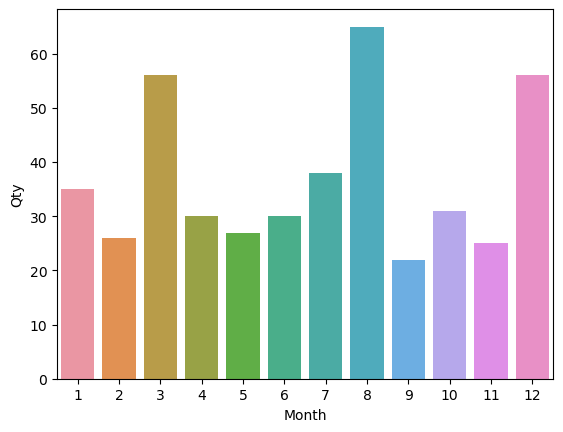

In [13]:
# Plot of sales qty by month of 2019 product irom man G
sn.barplot(data=dfStore1_2019_byMonth, x="Month", y="Qty")